In [5]:
import numpy as np
from gurobipy import *

# 数据准备
m = 4  # 供应商数量
n = 3  # 需求商数量
s = np.array([10, 30, 40, 20])  # 供应量
d = np.array([20, 50, 30])  # 需求量
c = np.array([[2, 3, 4], [3, 2, 1], [1, 4, 3], [4, 5, 2]])  # 成本
f = np.array([[10, 30, 20], [10, 30, 20], [10, 30, 20], [10, 30, 20]]) # 固定运价表 fij

# 构建模型
model = Model('transportation')
x = {}  # 创造一个决策变量的储存列表
y = {}

# 添加决策变量
for i in range(m):
    for j in range(n):
        name = 'x' + str(i) + '_' + str(j)
        x[i, j] = model.addVar(0, GRB.INFINITY, vtype=GRB.CONTINUOUS, name=name)
for i in range(m):
    for j in range(n):
        name = 'y' + str(i) + '_' + str(j)
        y[i, j] = model.addVar(0, 1 ,vtype=GRB.BINARY, name=name)
# 添加目标函数
model.setObjective(sum(x[i, j] * c[i, j] for i in range(m) for j in range(n)) +
                   sum(f[i][j] * y[i, j] for i in range(m) for j in range(n)), GRB.MINIMIZE)
# 添加产量约束
for i in range(m):
    model.addConstr(-sum(x[i, j] for j in range(n)) >= -s[i])

# 添加销量约束
for j in range(n):
    model.addConstr(sum(x[i, j] for i in range(m)) >= d[j])
###
for i in range(m):
    for j in range(n):
        model.addConstr(-x[i,j] +min(s[i], d[j]) * y[i,j] >=0)

# 模型求解
model.optimize()
# 结果输出
print('Obj：', model.ObjVal)
for key in x.keys():
    if x[key].X > 0:
        print(x[key].Varname+ ' = ', x[key].X)
for key in y.keys():
    if y[key].X > 0:
        print(y[key].Varname+ ' = ', y[key].X)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 19 rows, 24 columns and 48 nonzeros
Model fingerprint: 0x6f201683
Variable types: 12 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+00, 3e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+01]
Found heuristic solution: objective 420.0000000
Presolve time: 0.00s
Presolved: 19 rows, 24 columns, 48 nonzeros
Variable types: 12 continuous, 12 integer (12 binary)

Root relaxation: objective 3.216667e+02, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  321.66667    0    3  420.00000  321.66667  23.4%     -   

Restricted license - for non-production use only - expires 2026-11-23
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x60e6e1b1
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 4e+01]
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+32   2.625000e+30   2.500000e+02      0s
       2    1.0555556e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.055555556e+03
x_0 = 2.2222222222222223
x_1 = 5.555555555555555
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M1


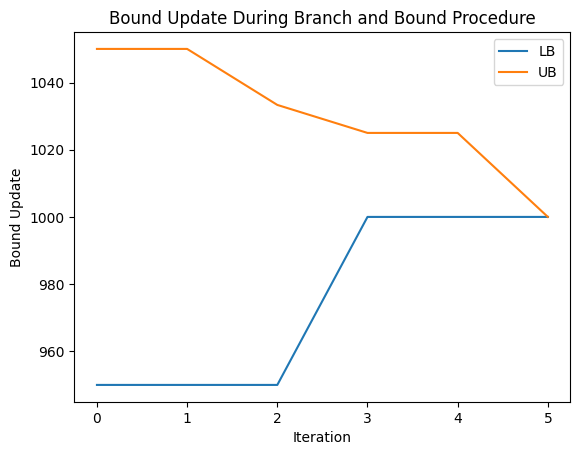

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 2 columns and 4 nonzeros
Model fingerprint: 0x60e6e1b1
Coefficient statistics:
  Matrix range     [1e+00, 6e+00]
  Objective range  [1e+02, 2e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+01, 4e+01]
Presolve time: 0.00s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5000000e+32   2.625000e+30   2.500000e+02      0s
       2    1.0555556e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.055555556e+03
x_0 = 2.2222222222222223
x_1 = 5.555555555555555
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 th

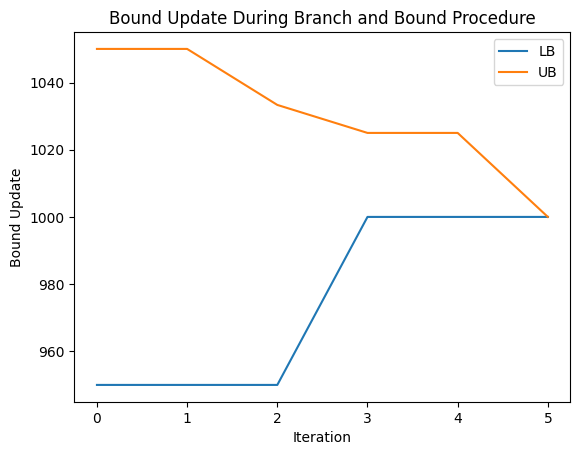

In [2]:
from gurobipy import *
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

############## define initial linear relaxation problem of primal problem ##############
initial_LP = Model('initial LP')
x = {}
for i in range(2):
    x[i] = initial_LP.addVar(lb=0,ub=GRB.INFINITY, vtype=GRB.CONTINUOUS,name = 'x_'+str(i))
initial_LP.setObjective(100*x[0]+150*x[1],GRB.MAXIMIZE)
initial_LP.addConstr(2*x[0]+x[1]<=10)
initial_LP.addConstr(3*x[0]+6*x[1]<=40)
initial_LP.optimize()
for var in initial_LP.getVars():
    print(var.Varname,'=',var.x)
initial_LP.status # 2: get the optimal value; 4: infeasible or unbounded; 5: unbounded

class Node:
    def __init__(self):
        self.model = None
        self.x_sol = {} #solution of sub-problem
        self.x_int_sol = {} #round integer of solution
        self.local_LB = 0  #local bound of node, sub-problem
        self.local_UB = np.inf
        self.is_integer = False #is integr solution
        self.branch_var_list = []  #store branch variable

    # deep copy the whole node
    def deepcopy(node):
        new_node = Node()
        new_node.local_LB = 0
        new_node.local_UB = np.inf
        new_node.x_sol = copy.deepcopy(node.x_sol) #solution of sub-problem
        new_node.x_int_sol = copy.deepcopy(node.x_int_sol) #round integer of solution
        new_node.branch_var_list = [] # do not copy, or that always use the same branch_var_list in sub-problem
        # deepcopy, or that the subproblem add all the new constraints sub-problem->infeasible
        new_node.model = node.model.copy()  # gurobi can deepcopy model
        new_node.is_integer = node.is_integer

        return new_node


def branch_and_bound(initial_LP):
    ############## store UB，LB and solution ##############
    trend_UB = []
    trend_LB =[]
    initial_LP.optimize()
    global_LB = 0
    global_UB = initial_LP.ObjVal
    eps = 1e-3
    incumbent_node = None
    Gap = np.inf
    ############## branch and bound begins ##############
    Queue = []
    #create root node
    node = Node()
    node.local_LB = 0
    # trend_LB.append(node.local_LB)
    node.local_UB = global_UB #root node
    # trend_UB.append(global_UB)
    node.model = initial_LP.copy() # gurobi can deepcopy model
    node.model.setParam('OutputFlag',0)
    Queue.append(node)
    #cycle
    cnt = 0
    while(len(Queue)>0 and global_UB - global_LB >eps):
        cnt += 1
        #Use depth-first search, last in, first out
        #pop: removes the last element element from a list and returns the value of that element
        current_node = Queue.pop()
        #solve the current node
        current_node.model.optimize()
        Solution_status = current_node.model.status

        #check the current solution(is_Integer, is_pruned)
        Is_Integer = True
        Is_pruned = False

        ############## check whether the sub-problem is feasible ##############
        if(Solution_status == 2): #2: get the optimal value
            ############## check whether the current solution is integer##############
            for var in current_node.model.getVars():
                current_node.x_sol[var.VarName] = var.x
                print(var.VarName,'=',var.x)
                # round the fractional solution, round down
                current_node.x_int_sol[var.VarName] = (int)(var.x)
                if (abs( (int)(var.x)-var.x)>= eps):
                    Is_Integer = False # judge whether the solution is integer or not
                    current_node.branch_var_list.append(var.VarName)
            #Update LB and UB
            ############## is integer, incumbent ##############
            if(Is_Integer == True):
                current_node.local_LB = current_node.model.ObjVal
                current_node.local_UB = current_node.model.ObjVal
                current_node.is_integer = True
                if(current_node.local_LB > global_LB):
                    global_LB = current_node.local_LB
                    incumbent_node = Node.deepcopy(current_node)

            else:
            ############## is not integer, then branch ##############
                Is_Integer = False
                current_node.local_UB = current_node.model.ObjVal
                if current_node.local_UB < global_LB:
                    Is_pruned = True
                    current_node.is_integer = False
                else:
                    Is_pruned = False
                    current_node.is_integer = False
                    for var_name in current_node.x_int_sol.keys():
                        var = current_node.model.getVarByName(var_name)
                        current_node.local_LB += current_node.x_int_sol[var_name]*var.Obj
                        # round down the solution of parent node，calculate the objective value for LB
                        # Notice that round down the solution can still be feasible for our example
                    ############### update LB ##############
                    if (current_node.local_LB > global_LB):
                        global_LB = current_node.local_LB
                        incumbent_node = Node.deepcopy(current_node)

                    ############## branch ##############
                    branch_var_name = current_node.branch_var_list[0]
                    left_var_bound = (int)(current_node.x_sol[branch_var_name])
                    right_var_bound = (int)(current_node.x_sol[branch_var_name])+1

                    #current two child nodes
                    left_node = Node.deepcopy(current_node)
                    right_node = Node.deepcopy(current_node)

                    #add branching constraints
                    temp_var = left_node.model.getVarByName(branch_var_name)
                    left_node.model.addConstr(temp_var <= left_var_bound,name = 'branch_left_'+str(cnt))
                    left_node.model.update() # lazy updation

                    temp_var = right_node.model.getVarByName(branch_var_name)
                    right_node.model.addConstr(temp_var >= right_var_bound,name = 'branch_right_'+str(cnt))
                    left_node.model.update()

                    Queue.append(left_node)
                    Queue.append(right_node)

        ############## prune by infeasibility ##############
        elif(Solution_status !=2):
            Is_Integer = False
            Is_pruned = True

        ############## update Upper bound ##############
        temp_global_UB = 0
        for node in Queue:
            node.model.optimize()
            if(node.model.status == 2):
                if(node.model.ObjVal >=temp_global_UB):
                    temp_global_UB = node.model.ObjVal
        global_UB = temp_global_UB
        Gap = 100*(global_UB - global_LB)/global_LB
        print('Gap:',Gap,' %')
        trend_UB.append(global_UB)
        trend_LB.append(global_LB)

    print(' ---------------------------------- ')
    print(' Optimal solution found ')
    print(' ---------------------------------- ')
    print('Solution:', incumbent_node.x_int_sol)
    print('Obj:', global_LB)
    plt.figure()
    plt.plot( trend_LB , label="LB")
    plt.plot( trend_UB, label="UB")
    plt.xlabel('Iteration')
    plt.ylabel('Bound Update')
    plt.title("Bound Update During Branch and Bound Procedure")
    plt.legend()
    plt.show()
    return incumbent_node, Gap
############## Call branch and bound function ##############
#Notice that we use the linear relaxation of primal model as input parameter
incumbent_node, Gap = branch_and_bound(initial_LP)
from gurobipy import *
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

############## define initial linear relaxation problem of primal problem ##############
initial_LP = Model('initial LP')
x = {}
for i in range(2):
    x[i] = initial_LP.addVar(lb=0,ub=GRB.INFINITY, vtype=GRB.CONTINUOUS,name = 'x_'+str(i))
initial_LP.setObjective(100*x[0]+150*x[1],GRB.MAXIMIZE)
initial_LP.addConstr(2*x[0]+x[1]<=10)
initial_LP.addConstr(3*x[0]+6*x[1]<=40)
initial_LP.optimize()
for var in initial_LP.getVars():
    print(var.Varname,'=',var.x)
initial_LP.status # 2: get the optimal value; 4: infeasible or unbounded; 5: unbounded

class Node:
    def __init__(self):
        self.model = None
        self.x_sol = {} #solution of sub-problem
        self.x_int_sol = {} #round integer of solution
        self.local_LB = 0  #local bound of node, sub-problem
        self.local_UB = np.inf
        self.is_integer = False #is integr solution
        self.branch_var_list = []  #store branch variable

    # deep copy the whole node
    def deepcopy(node):
        new_node = Node()
        new_node.local_LB = 0
        new_node.local_UB = np.inf
        new_node.x_sol = copy.deepcopy(node.x_sol) #solution of sub-problem
        new_node.x_int_sol = copy.deepcopy(node.x_int_sol) #round integer of solution
        new_node.branch_var_list = [] # do not copy, or that always use the same branch_var_list in sub-problem
        # deepcopy, or that the subproblem add all the new constraints sub-problem->infeasible
        new_node.model = node.model.copy()  # gurobi can deepcopy model
        new_node.is_integer = node.is_integer

        return new_node


def branch_and_bound(initial_LP):
    ############## store UB，LB and solution ##############
    trend_UB = []
    trend_LB =[]
    initial_LP.optimize()
    global_LB = 0
    global_UB = initial_LP.ObjVal
    eps = 1e-3
    incumbent_node = None
    Gap = np.inf
    ############## branch and bound begins ##############
    Queue = []
    #create root node
    node = Node()
    node.local_LB = 0
    # trend_LB.append(node.local_LB)
    node.local_UB = global_UB #root node
    # trend_UB.append(global_UB)
    node.model = initial_LP.copy() # gurobi can deepcopy model
    node.model.setParam('OutputFlag',0)
    Queue.append(node)
    #cycle
    cnt = 0
    while(len(Queue)>0 and global_UB - global_LB >eps):
        cnt += 1
        #Use depth-first search, last in, first out
        #pop: removes the last element element from a list and returns the value of that element
        current_node = Queue.pop()
        #solve the current node
        current_node.model.optimize()
        Solution_status = current_node.model.status

        #check the current solution(is_Integer, is_pruned)
        Is_Integer = True
        Is_pruned = False

        ############## check whether the sub-problem is feasible ##############
        if(Solution_status == 2): #2: get the optimal value
            ############## check whether the current solution is integer##############
            for var in current_node.model.getVars():
                current_node.x_sol[var.VarName] = var.x
                print(var.VarName,'=',var.x)
                # round the fractional solution, round down
                current_node.x_int_sol[var.VarName] = (int)(var.x)
                if (abs( (int)(var.x)-var.x)>= eps):
                    Is_Integer = False # judge whether the solution is integer or not
                    current_node.branch_var_list.append(var.VarName)
            #Update LB and UB
            ############## is integer, incumbent ##############
            if(Is_Integer == True):
                current_node.local_LB = current_node.model.ObjVal
                current_node.local_UB = current_node.model.ObjVal
                current_node.is_integer = True
                if(current_node.local_LB > global_LB):
                    global_LB = current_node.local_LB
                    incumbent_node = Node.deepcopy(current_node)

            else:
            ############## is not integer, then branch ##############
                Is_Integer = False
                current_node.local_UB = current_node.model.ObjVal
                if current_node.local_UB < global_LB:
                    Is_pruned = True
                    current_node.is_integer = False
                else:
                    Is_pruned = False
                    current_node.is_integer = False
                    for var_name in current_node.x_int_sol.keys():
                        var = current_node.model.getVarByName(var_name)
                        current_node.local_LB += current_node.x_int_sol[var_name]*var.Obj
                        # round down the solution of parent node，calculate the objective value for LB
                        # Notice that round down the solution can still be feasible for our example
                    ############### update LB ##############
                    if (current_node.local_LB > global_LB):
                        global_LB = current_node.local_LB
                        incumbent_node = Node.deepcopy(current_node)

                    ############## branch ##############
                    branch_var_name = current_node.branch_var_list[0]
                    left_var_bound = (int)(current_node.x_sol[branch_var_name])
                    right_var_bound = (int)(current_node.x_sol[branch_var_name])+1

                    #current two child nodes
                    left_node = Node.deepcopy(current_node)
                    right_node = Node.deepcopy(current_node)

                    #add branching constraints
                    temp_var = left_node.model.getVarByName(branch_var_name)
                    left_node.model.addConstr(temp_var <= left_var_bound,name = 'branch_left_'+str(cnt))
                    left_node.model.update() # lazy updation

                    temp_var = right_node.model.getVarByName(branch_var_name)
                    right_node.model.addConstr(temp_var >= right_var_bound,name = 'branch_right_'+str(cnt))
                    left_node.model.update()

                    Queue.append(left_node)
                    Queue.append(right_node)

        ############## prune by infeasibility ##############
        elif(Solution_status !=2):
            Is_Integer = False
            Is_pruned = True

        ############## update Upper bound ##############
        temp_global_UB = 0
        for node in Queue:
            node.model.optimize()
            if(node.model.status == 2):
                if(node.model.ObjVal >=temp_global_UB):
                    temp_global_UB = node.model.ObjVal
        global_UB = temp_global_UB
        Gap = 100*(global_UB - global_LB)/global_LB
        print('Gap:',Gap,' %')
        trend_UB.append(global_UB)
        trend_LB.append(global_LB)

    print(' ---------------------------------- ')
    print(' Optimal solution found ')
    print(' ---------------------------------- ')
    print('Solution:', incumbent_node.x_int_sol)
    print('Obj:', global_LB)
    plt.figure()
    plt.plot( trend_LB , label="LB")
    plt.plot( trend_UB, label="UB")
    plt.xlabel('Iteration')
    plt.ylabel('Bound Update')
    plt.title("Bound Update During Branch and Bound Procedure")
    plt.legend()
    plt.show()
    return incumbent_node, Gap
############## Call branch and bound function ##############
#Notice that we use the linear relaxation of primal model as input parameter
incumbent_node, Gap = branch_and_bound(initial_LP)

In [3]:
from gurobipy import *
import time

start = time.time()
m = 4  # 供应点
n = 3  # 需求点
s = [10, 30, 40, 20]  # 供应量
d = [20, 50, 30]  # 需求量
f = [[10, 30, 20], [10, 30, 20], [10, 30, 20], [10, 30, 20]]  # 固定运价表 fij
c = [[2, 3, 4], [3, 2, 1], [1, 4, 3], [4, 5, 2]]  # 单位运价表 cij

print('====求解 Dual_SP 1======')
Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj = LinExpr()
for i in range(m):
    obj.addTerms(-s[i],u[i])
for j in range(n):
    obj.addTerms(d[j],v[j])

Dual_SP.setObjective(obj,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(-1 * u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))

Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x > 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x > 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
else:
    print('====Infeasibile or Unbounded information=====')

    for i in range(m):
        print('extreme ray: {} = {}'.format(u[i].varName, u[i].UnbdRay))
    for j in range(n):
        print('extreme ray: {} = {}'.format(v[j].varName, v[j].UnbdRay))
    for i in range(m):
        for j in range(n):
            print('extreme ray: {} = {}'.format(w[i,j].varName, w[i,j].UnbdRay))
end = time.time()
cost = end - start
print('DUal_SP1 求解时间', cost)

start = time.time()
print('====求解 MP1======')
MP =Model('Benders decomposition_MP')

"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)

MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP1 求解时间', cost)


start = time.time()
print('=====对偶子问题（step 2）====')
y_ij_bar = [1,1,1,1,1,1,1,1,1,1,1,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj = LinExpr()
for i in range(m):
    obj.addTerms(-s[i],u[i])
for j in range(n):
    obj.addTerms(d[j],v[j])
for i in range(m):
    for j in range(n):
        obj.addTerms(-min(s[i],d[j]),w[i,j])

Dual_SP.setObjective(obj,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(-1 * u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))
Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >=0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))

end = time.time()
cost = end - start
print('Dual_SP2 求解时间', cost)


start = time.time()
print('====求解 MP2======')
MP =Model('Benders decomposition_MP')

"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)

MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP2 求解时间', cost)


start = time.time()
print('=====对偶子问题（step 3）====')
y_ij_bar = [0,0,0,1,0,0,1,1,0,0,0,0]

Dual_SP = Model('Dual SP')

"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])

obj2 = -20*w[1,0]-20*w[2,0]-40*w[2,1]

Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))

Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x > 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x > 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))

else:
    print('====Infeasibile or Unbounded information=====')

    for i in range(m):
        print('extreme ray: {} = {}'.format(u[i].varName, u[i].UnbdRay))
    for j in range(n):
        print('extreme ray: {} = {}'.format(v[j].varName, v[j].UnbdRay))
    for i in range(m):
        for j in range(n):
            print('extreme ray: {} = {}'.format(w[i,j].varName, w[i,j].UnbdRay))

end = time.time()
cost = end - start
print('Dual_SP3 求解时间', cost)

start = time.time()
print('====求解 MP3======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP3求解时间', cost)


start = time.time()
print('=====对偶子问题（step 4）====')
y_ij_bar = [0,0,0,1,0,1,0,0,1,0,0,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])

obj2 = -20*w[1,0]-30*w[1,2]-30*w[2,2]-20*w[3,2]

Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))

Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x > 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x > 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
else:
    print('====Infeasibile or Unbounded information=====')

    for i in range(m):
        print('extreme ray: {} = {}'.format(u[i].varName, u[i].UnbdRay))
    for j in range(n):
        print('extreme ray: {} = {}'.format(v[j].varName, v[j].UnbdRay))
    for i in range(m):
        for j in range(n):
            print('extreme ray: {} = {}'.format(w[i,j].varName, w[i,j].UnbdRay))
end = time.time()
cost = end - start
print('Dual_SP4 求解时间', cost)

start = time.time()
print('====求解 MP4======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP4 求解时间', cost)

start = time.time()
print('=====对偶子问题（step 5）====')
y_ij_bar = [0,0,0,1,0,1,0,1,0,0,0,1]

Dual_SP = Model('Dual SP')

"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -20*w[1,0]-30*w[1,1]-40*w[2,1]-20*w[3,2]

Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
else:
    print('====Infeasibile or Unbounded information=====')

    for i in range(m):
        print('extreme ray: {} = {}'.format(u[i].varName, u[i].UnbdRay))
    for j in range(n):
        print('extreme ray: {} = {}'.format(v[j].varName, v[j].UnbdRay))
    for i in range(m):
        for j in range(n):
            print('extreme ray: {} = {}'.format(w[i,j].varName, w[i,j].UnbdRay))
end = time.time()
cost = end - start
print('Dusl_SP5 求解时间', cost)


start = time.time()
print('====求解 MP5======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP5 求解时间', cost)


start = time.time()
print('=====对偶子问题（step 6）====')
y_ij_bar = [1,0,0,0,1,0,0,1,0,0,0,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -10*w[0,0]-30*w[1,1]-40*w[2,1]-20*w[3,2]

Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
else:
    print('====Infeasibile or Unbounded information=====')
    for i in range(m):
        print('extreme ray: {} = {}'.format(u[i].varName, u[i].UnbdRay))
    for j in range(n):
        print('extreme ray: {} = {}'.format(v[j].varName, v[j].UnbdRay))
    for i in range(m):
        for j in range(n):
            print('extreme ray: {} = {}'.format(w[i,j].varName, w[i,j].UnbdRay))
end = time.time()
cost = end - start
print('Dual_SP6 求解时间', cost)


start = time.time()
print('====求解 MP6======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.addConstr(30-10*y[0,0]-10*y[0,2]-20*y[1,0]-30*y[1,2]-20*y[2,0]-30*y[2,2]<=0,name='benders feasibility cut iter 6')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP 6 求解时间', cost)



start = time.time()
print('=====对偶子问题（step 7）====')
y_ij_bar = [1,0,0,0,1,0,1,1,0,0,0,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -10*w[0,0]-30*w[1,1]-20*w[2,0]-40*w[2,1]-20*w[3,2]

Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
else:
    print('====Infeasibile or Unbounded information=====')
    for i in range(m):
        print('extreme ray: {} = {}'.format(u[i].varName, u[i].UnbdRay))
    for j in range(n):
        print('extreme ray: {} = {}'.format(v[j].varName, v[j].UnbdRay))
    for i in range(m):
        for j in range(n):
            print('extreme ray: {} = {}'.format(w[i,j].varName, w[i,j].UnbdRay))
end = time.time()
cost = end - start
print('Dual_SP7 求解时间', cost)


start = time.time()
print('====求解 MP7======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.addConstr(30-10*y[0,0]-10*y[0,2]-20*y[1,0]-30*y[1,2]-20*y[2,0]-30*y[2,2]<=0,name='benders feasibility cut iter 6')

MP.addConstr(30-10*y[0,2]-30*y[1,2]-30*y[2,2]-20*y[3,2]<=0,name='benders feasibility cut iter 7')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP 7 求解时间', cost)


start = time.time()
print('=====对偶子问题（step 8）====')
y_ij_bar = [0,1,0,0,0,1,0,1,0,0,0,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -10*w[0,1]-30*w[1,2]-40*w[2,1]-20*w[3,2]
Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
else:
    print('====Infeasibile or Unbounded information=====')
    for i in range(m):
        print('extreme ray: {} = {}'.format(u[i].varName, u[i].UnbdRay))
    for j in range(n):
        print('extreme ray: {} = {}'.format(v[j].varName, v[j].UnbdRay))
    for i in range(m):
        for j in range(n):
            print('extreme ray: {} = {}'.format(w[i,j].varName, w[i,j].UnbdRay))
end = time.time()
cost = end - start
print('Dual_SP8 求解时间', cost)


start = time.time()
print('====求解 MP8======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.addConstr(30-10*y[0,0]-10*y[0,2]-20*y[1,0]-30*y[1,2]-20*y[2,0]-30*y[2,2]<=0,name='benders feasibility cut iter 6')

MP.addConstr(30-10*y[0,2]-30*y[1,2]-30*y[2,2]-20*y[3,2]<=0,name='benders feasibility cut iter 7')

MP.addConstr(70-10*y[0,0]-10*y[0,1]-20*y[1,0]-30*y[1,1]-20*y[2,0]-40*y[2,1]-20*y[3,0]-20*y[3,1]<=0,name='benders feasibility cut iter 8')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP8 求解时间', cost)


start = time.time()
print('=====对偶子问题（step 9）====')
y_ij_bar = [1,0,0,0,1,1,0,1,0,0,0,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -10*w[0,0]-30*w[1,1]-30*w[1,2]-40*w[2,1]-20*w[3,2]
Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
else:
    print('====Infeasibile or Unbounded information=====')
    for i in range(m):
        print('extreme ray: {} = {}'.format(u[i].varName, u[i].UnbdRay))
    for j in range(n):
        print('extreme ray: {} = {}'.format(v[j].varName, v[j].UnbdRay))
    for i in range(m):
        for j in range(n):
            print('extreme ray: {} = {}'.format(w[i,j].varName, w[i,j].UnbdRay))
end = time.time()
cost = end - start
print('Dual_SP9 求解时间', cost)



start = time.time()
print('====求解 MP9======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.addConstr(30-10*y[0,0]-10*y[0,2]-20*y[1,0]-30*y[1,2]-20*y[2,0]-30*y[2,2]<=0,name='benders feasibility cut iter 6')

MP.addConstr(30-10*y[0,2]-30*y[1,2]-30*y[2,2]-20*y[3,2]<=0,name='benders feasibility cut iter 7')

MP.addConstr(70-10*y[0,0]-10*y[0,1]-20*y[1,0]-30*y[1,1]-20*y[2,0]-40*y[2,1]-20*y[3,0]-20*y[3,1]<=0,name='benders feasibility cut iter 8')

MP.addConstr(20-10*y[0,0]-20*y[1,0]-20*y[2,0]-20*y[3,0]<=0,name='benders feasibility cut iter 9')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP 9  求解时间', cost)


start = time.time()
print('=====对偶子问题（step 10）====')
y_ij_bar = [0,0,1,0,1,0,1,1,0,0,0,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -10*w[0,2]-30*w[1,1]-20*w[2,0]-40*w[2,1]-20*w[3,2]
Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
end = time.time()
cost = end - start
print('Dual_SP10 求解时间', cost)

start = time.time()
print('====求解 MP10======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.addConstr(30-10*y[0,0]-10*y[0,2]-20*y[1,0]-30*y[1,2]-20*y[2,0]-30*y[2,2]<=0,name='benders feasibility cut iter 6')

MP.addConstr(30-10*y[0,2]-30*y[1,2]-30*y[2,2]-20*y[3,2]<=0,name='benders feasibility cut iter 7')

MP.addConstr(70-10*y[0,0]-10*y[0,1]-20*y[1,0]-30*y[1,1]-20*y[2,0]-40*y[2,1]-20*y[3,0]-20*y[3,1]<=0,name='benders feasibility cut iter 8')

MP.addConstr(20-10*y[0,0]-20*y[1,0]-20*y[2,0]-20*y[3,0]<=0,name='benders feasibility cut iter 9')

MP.addConstr(340 -10*y[0,1]-60*y[1,1]-90*y[1,2]-30*y[2,2]-40*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 10')

MP.optimize()

print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP10 求解时间', cost)

start = time.time()
print('=====对偶子问题（step 11）====')
y_ij_bar = [0,1,0,0,0,1,0,1,0,1,0,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -10*w[0,1]-30*w[1,2]-40*w[2,1]-20*w[3,0]-20*w[3,2]
Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

Dual_SP.optimize()

print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
end = time.time()
cost = end - start
print('Dual_SP11 求解时间', cost)


start = time.time()
print('====求解 MP11======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.addConstr(30-10*y[0,0]-10*y[0,2]-20*y[1,0]-30*y[1,2]-20*y[2,0]-30*y[2,2]<=0,name='benders feasibility cut iter 6')

MP.addConstr(30-10*y[0,2]-30*y[1,2]-30*y[2,2]-20*y[3,2]<=0,name='benders feasibility cut iter 7')

MP.addConstr(70-10*y[0,0]-10*y[0,1]-20*y[1,0]-30*y[1,1]-20*y[2,0]-40*y[2,1]-20*y[3,0]-20*y[3,1]<=0,name='benders feasibility cut iter 8')

MP.addConstr(20-10*y[0,0]-20*y[1,0]-20*y[2,0]-20*y[3,0]<=0,name='benders feasibility cut iter 9')

MP.addConstr(340 -10*y[0,1]-60*y[1,1]-90*y[1,2]-30*y[2,2]-40*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 10')

MP.addConstr(300 -10*y[0,0]-20*y[1,0]-60*y[1,1]-60*y[2,0] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 11')

MP.optimize()
MP.write("1.lp")
print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)

end = time.time()
cost = end - start
print('MP11 求解时间', cost)

start = time.time()
print('=====对偶子问题（step 12）====')
y_ij_bar = [1,0,0,1,1,1,0,0,0,0,1,0]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -10*w[0,0]-20*w[1,0]-30*w[1,1]-30*w[1,2]-20*w[3,1]
Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()
Dual_SP.write("1.lp")
print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
else:
    print('====Infeasibile or Unbounded information=====')
    for i in range(m):
        print('extreme ray: {} = {}'.format(u[i].varName, u[i].UnbdRay))
    for j in range(n):
        print('extreme ray: {} = {}'.format(v[j].varName, v[j].UnbdRay))
    for i in range(m):
        for j in range(n):
            print('extreme ray: {} = {}'.format(w[i,j].varName, w[i,j].UnbdRay))
end = time.time()
cost = end - start
print('Dual_SP12 求解时间', cost)


start = time.time()
print('====求解 MP12======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.addConstr(30-10*y[0,0]-10*y[0,2]-20*y[1,0]-30*y[1,2]-20*y[2,0]-30*y[2,2]<=0,name='benders feasibility cut iter 6')

MP.addConstr(30-10*y[0,2]-30*y[1,2]-30*y[2,2]-20*y[3,2]<=0,name='benders feasibility cut iter 7')

MP.addConstr(70-10*y[0,0]-10*y[0,1]-20*y[1,0]-30*y[1,1]-20*y[2,0]-40*y[2,1]-20*y[3,0]-20*y[3,1]<=0,name='benders feasibility cut iter 8')

MP.addConstr(20-10*y[0,0]-20*y[1,0]-20*y[2,0]-20*y[3,0]<=0,name='benders feasibility cut iter 9')

MP.addConstr(340 -10*y[0,1]-60*y[1,1]-90*y[1,2]-30*y[2,2]-40*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 10')

MP.addConstr(300 -10*y[0,0]-20*y[1,0]-60*y[1,1]-60*y[2,0] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 11')

MP.addConstr(40-20*y[2,0]-40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 12')

MP.optimize()
MP.write("1.lp")
print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP12 求解时间', cost)


start = time.time()
print('=====对偶子问题（step 13）====')
y_ij_bar = [1,0,0,0,1,1,1,1,0,0,0,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -10*w[0,0]-30*w[1,1]-30*w[1,2]-20*w[2,0]-40*w[2,1]-20*w[3,2]
Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

# Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()
Dual_SP.write("1.lp")
print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
end = time.time()
cost = end - start
print('Dual_SP13 求解时间', cost)



start = time.time()
print('====求解 MP13======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.addConstr(30-10*y[0,0]-10*y[0,2]-20*y[1,0]-30*y[1,2]-20*y[2,0]-30*y[2,2]<=0,name='benders feasibility cut iter 6')

MP.addConstr(30-10*y[0,2]-30*y[1,2]-30*y[2,2]-20*y[3,2]<=0,name='benders feasibility cut iter 7')

MP.addConstr(70-10*y[0,0]-10*y[0,1]-20*y[1,0]-30*y[1,1]-20*y[2,0]-40*y[2,1]-20*y[3,0]-20*y[3,1]<=0,name='benders feasibility cut iter 8')

MP.addConstr(20-10*y[0,0]-20*y[1,0]-20*y[2,0]-20*y[3,0]<=0,name='benders feasibility cut iter 9')

MP.addConstr(340 -10*y[0,1]-60*y[1,1]-90*y[1,2]-30*y[2,2]-40*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 10')

MP.addConstr(300 -10*y[0,0]-20*y[1,0]-60*y[1,1]-60*y[2,0] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 11')

MP.addConstr(40-20*y[2,0]-40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 12')

MP.addConstr(280 -20*y[0,1]-40*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 13')

MP.optimize()
MP.write("1.lp")
print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)
end = time.time()
cost = end - start
print('MP13 求解时间', cost)


start = time.time()
print('=====对偶子问题（step 14）====')
y_ij_bar = [0,1,0,1,0,1,1,1,0,0,0,1]

Dual_SP = Model('Dual SP')
"""create decision variables"""
u = Dual_SP.addVars(m, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'u')
v = Dual_SP.addVars(n, lb = 0, ub = GRB.INFINITY, vtype = GRB.CONTINUOUS, name = 'v')
w = Dual_SP.addVars(((i, j) for i in range(m) for j in range(n)), lb = 0, ub = GRB.INFINITY,
                        vtype = GRB.CONTINUOUS, name = 'w')
"""create objective"""
obj1 = LinExpr()
for i in range(m):
    obj1.addTerms(-s[i],u[i])
for j in range(n):
    obj1.addTerms(d[j],v[j])
obj2 = -10*w[0,1]-20*w[1,0]-30*w[1,2]-20*w[2,0]-40*w[2,1]-20*w[3,2]
Dual_SP.setObjective(obj1+obj2,GRB.MAXIMIZE)
"""add constraint"""
Dual_SP.addConstrs(- u[i] + v[j] - w[i, j] <= c[i][j] for i in range(m) for j in range(n))\

# Dual_SP.setParam('InfUnbdInfo', 1)
Dual_SP.optimize()
Dual_SP.write("1.lp")
print('\n')
print('Model status:', Dual_SP.status)
if(Dual_SP.status == 2):
    print('Obj:', Dual_SP.ObjVal)
    for i in range(m):
        if(u[i].x >= 0):
            print('{} = {}'.format(u[i].varName, u[i].x))
    for j in range(n):
        if(v[j].x >= 0):
            print('{} = {}'.format(v[j].varName, v[j].x))
    for i in range(m):
        for j in range(n):
            print('{} = {}'.format(w[i,j].varName, w[i,j].x))
end = time.time()
cost = end - start
print('Dual_SP14 求解时间', cost)


start = time.time()
print('====求解 MP14======')
MP =Model('Benders decomposition_MP')
"""create decision variables"""
y = MP.addVars(((i, j) for i in range(m) for j in range(n)), vtype = GRB.BINARY, name = 'y')
z = MP.addVar(vtype = GRB.CONTINUOUS, name = 'z')

MP.setObjective(z,GRB.MINIMIZE)
MP.addConstr(80-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[2,0]
             -40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 1')

MP.addConstr(240 - 20*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 2')

MP.addConstr(60-10*y[0,0]-10*y[0,1]-10*y[0,2]-20*y[1,0]-30*y[1,1]-30*y[1,2]-20*y[3,0]
             -20*y[3,1]-20*y[3,2]<=0,name='benders feasibility cut iter 3')

MP.addConstr(50-10*y[0,1]-30*y[1,1]-40*y[2,1]-20*y[3,1]<=0,name='benders feasibility cut iter 4')

MP.addConstr(10-10*y[0,0]-10*y[0,1]-10*y[0,2]<=0,name='benders feasibility cut iter 5')

MP.addConstr(30-10*y[0,0]-10*y[0,2]-20*y[1,0]-30*y[1,2]-20*y[2,0]-30*y[2,2]<=0,name='benders feasibility cut iter 6')

MP.addConstr(30-10*y[0,2]-30*y[1,2]-30*y[2,2]-20*y[3,2]<=0,name='benders feasibility cut iter 7')

MP.addConstr(70-10*y[0,0]-10*y[0,1]-20*y[1,0]-30*y[1,1]-20*y[2,0]-40*y[2,1]-20*y[3,0]-20*y[3,1]<=0,name='benders feasibility cut iter 8')

MP.addConstr(20-10*y[0,0]-20*y[1,0]-20*y[2,0]-20*y[3,0]<=0,name='benders feasibility cut iter 9')

MP.addConstr(340 -10*y[0,1]-60*y[1,1]-90*y[1,2]-30*y[2,2]-40*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 10')

MP.addConstr(300 -10*y[0,0]-20*y[1,0]-60*y[1,1]-60*y[2,0] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 11')

MP.addConstr(40-20*y[2,0]-40*y[2,1]-30*y[2,2]<=0,name='benders feasibility cut iter 12')

MP.addConstr(280 -20*y[0,1]-40*y[3,2] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 13')

MP.addConstr(300 -120*y[1,1]-40*y[3,1] + 10*y[0,0]+30*y[0,1]+20*y[0,2]+ 10*y[1,0]+30*y[1,1]+20*y[1,2]
             + 10*y[2,0]+30*y[2,1]+20*y[2,2]+ 10*y[3,0]+30*y[3,1]+20*y[3,2]<= z,name='benders optimality cut iter 14')

MP.optimize()
MP.write("1.lp")
print('\n\n')
print('Obj:',MP.ObjVal)
print('z = %4.1f'%(z.x))
for key in y.keys():
    if(y[key].x >= 0 ):
        print(y[key].VarName + ' = ', y[key].x)

end = time.time()
cost = end - start
print('MP 14求解时间', cost)



====求解 Dual_SP 1======
Set parameter InfUnbdInfo to value 1
Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (mac64[arm] - Darwin 24.1.0 24B91)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
InfUnbdInfo  1

Optimize a model with 12 rows, 19 columns and 36 nonzeros
Model fingerprint: 0x4e1d9630
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+01, 5e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 12 rows and 16 columns
Presolve time: 0.00s
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.0000000e+32   1.200000e+31   1.000000e+02      0s

Solved in 16 iterations and 0.00 seconds (0.00 work units)
Unbounded model


Model status: 5
====Infeasibile or Unbounded information=====
extreme ray: u[0] = 0.0
extreme ray: u[1] = 0.0
extreme ray: u[2] = 0.0
extreme ray: u[3] = 1.0
extreme ray: v[0] = 1.0
extreme ray: v[1] = 1